In [ ]:
import tensorflow as tf

from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

### Create and visualize a classification dataset using Scikit-Learn's `make_moons()` function ###

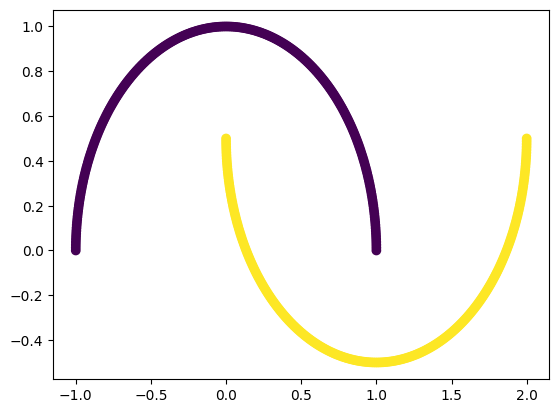

In [ ]:
X, y = make_moons(n_samples = 500)

plt.scatter(X[:,0], X[:,1], c = y)
plt.show()

### Build a model using Sequantial API ###

In [ ]:
model_sequential = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation = 'relu'),
    tf.keras.layers.Dense(16, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model_sequential.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                  optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
                  metrics = ['accuracy'])

# Create EarlyStopping callback to stop training when accuracy is good enough
stop = tf.keras.callbacks.EarlyStopping(monitor = 'accuracy', patience = 3)

history_sequantial = model_sequential.fit(X, y, epochs = 100, callbacks = [stop])

Epoch 1/100
16/16 [==============================] - 2s 3ms/step - loss: 0.5038 - accuracy: 0.8060
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.2789 - accuracy: 0.8660
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.2254 - accuracy: 0.8960
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.1938 - accuracy: 0.8960
Epoch 5/100
16/16 [==============================] - 0s 3ms/step - loss: 0.1412 - accuracy: 0.9380
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.1055 - accuracy: 0.9600
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.0709 - accuracy: 0.9720
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.0467 - accuracy: 0.9860
Epoch 9/100
16/16 [==============================] - 0s 3ms/step - loss: 0.0272 - accuracy: 0.9980
Epoch 10/100
16/16 [==============================] - 0s 2ms/step - loss: 0.0174 - accuracy: 1.0000
Epoch 11/

### Visualize the decision boundary ###

In [ ]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 2s 4ms/step
doing binary classifcation...


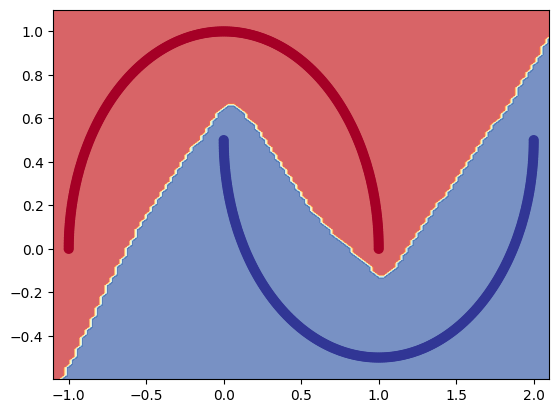

In [ ]:
plot_decision_boundary(model_sequential, X, y)

### Same model using the functional API ###

In [ ]:
inputs = tf.keras.layers.Input(shape = (None, 2))

x = tf.keras.layers.Dense(16, activation = 'relu')(inputs)
x = tf.keras.layers.Dense(16, activation = 'relu')(x)
outputs = tf.keras.layers.Dense(1, activation = 'sigmoid')(x)

model_functional = tf.keras.Model(inputs, outputs)


history_functional = model_functional.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                  optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
                  metrics = ['accuracy'])

model_functional.fit(X, y, epochs = 100, callbacks = [stop])

Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 0.5137 - accuracy: 0.8400
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.2862 - accuracy: 0.8700
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.2296 - accuracy: 0.8880
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.2014 - accuracy: 0.8920
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.1882 - accuracy: 0.9180
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.1667 - accuracy: 0.9120
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.1328 - accuracy: 0.9360
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.1328 - accuracy: 0.9360
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.0918 - accuracy: 0.9560
Epoch 10/100
16/16 [==============================] - 0s 2ms/step - loss: 0.0694 - accuracy: 0.9700
Epoch 11/

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


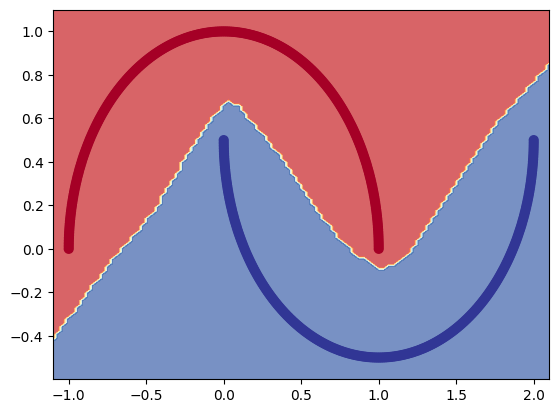

In [ ]:
plot_decision_boundary(model_functional, X, y)